## Exercise 1:

One implementation of the Radon transform and the FBP can be found in the [`scikit-image` toolbox](http://scikit-image.org/). Study the [demo script](http://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html) 
to figure out how to load a simple image, compute its Radon transform to simulate sinogram data and how to run a FBP to obtain a reconstruction from this data. Choose image size and angle set independent from each other and set `circle=False`. 
* Now we examine what happens if we add noise to the sinogram data. Let $f = K u$ be the clean sinogram data arranged as a $m \times 1$ vector and generate noisy data by setting $f^\delta = f + \sigma_{rel} \|f\|_{\infty} \varepsilon$, where $\varepsilon$ is a $m\times 1$ vector of standard normal distributed random variables and $\sigma_{rel} \geqslant 0$ corresponds to the relative noise level. Examine how the FBP reacts to different noise levels and how changing the frequency filter affects the results.  
* In many applications, the range of available projection angles is restricted $\theta \in [\theta_{min}, \theta_{max}]$, $\theta_{min} > 0$, $\theta_{max} < \pi$ or the angular resolution is very coarse. Examine the effects of these restrictions on FBP reconstructions. In limited angle tomography, which parts of the image are lost? 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon,iradon

In [7]:
def tomorecon(image,theta):
    # make sinogram
    sinogram = radon(image, theta=theta, circle=True)
    # reconstruction
    reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
    # return
    return reconstruction_fbp

In [8]:
# grid
n = 128
x = np.linspace(-1,1,n)
y = np.linspace(-1,1,n)
theta = np.linspace(0., 180.,n, endpoint=False)
xx,yy = np.meshgrid(x,y)

# ground truth image
image = (np.abs(xx)<0.2)*(np.abs(yy)<0.2)

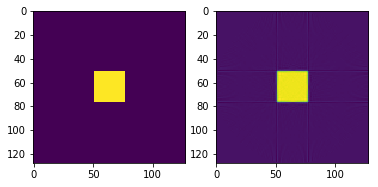

In [10]:
# full reconstruction
recon = tomorecon(image,theta)
fig,axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(recon)

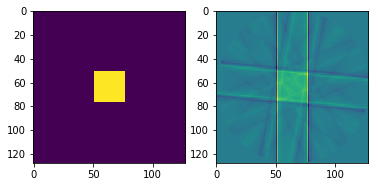

In [14]:
# course angle reconstruction
recon = tomorecon(image,theta[::20])
fig,axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(recon)

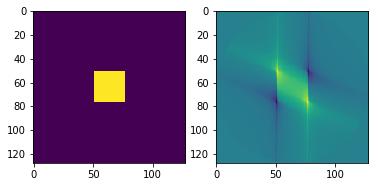

In [16]:
# limited angle reconstruction
recon = tomorecon(image,theta[:50])
fig,axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(recon)